**<font color='blue'>Q1: What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?</font>**

<font color='crimson'>The depth of a well-balanced binary tree containing m leaves is equal to $log_2(m)$, rounded up.</font> **A binary Decision Tree (implemented in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions.** Thus, if the training set contains one million instances, the Decision Tree will have a depth of $log_2(10^6) \approx 20$ (actually a bit more since the tree will generally not be perfectly well balanced).

**<font color='blue'>Q2: Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?</font>**

<font color='crimson'>A node’s Gini impurity is <b>generally</b> lower than its parent’s.</font> This is due to the CART training algorithm’s cost function, which splits each node in a way that minimizes the weighted sum of its children’s Gini impurities. <font color='crimson'>However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease in the other child’s impurity.</font>

> **Example:** A node contains 4 instances of class A and 1 of class B. Its Gini impurity is $1-(\frac{1}{5})^2-(\frac{4}{5})^2=0.32$. Suppose that the dataset is 1-d and the 5 instances are lined up in the following order: *A, B, A, A, A*. The CART algorithm will split this node after the 2nd instance, producing one child node with instances (*A, B*), and the other child node with instances (*A, A, A*). The left child node's Gini impurity is $1-(\frac{1}{2})^2-(\frac{1}{2})^2=0.5$, which is higher than its parent. This is compensated for by the fact that the other node is pure, so its overall weighted Gini impurity is $2/5\times 0.5 + 3/5 \times 0=0.2$, which is lower than the parent's Gini impurity.

**<font color='blue'>Q3: If a Decision Tree is overfitting the training set, is it a good idea to try decreasing <code>max_depth</code>?</font>**

**Yes!** This will constrain the model, regularizing it.

**<font color='blue'>Q4: If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?</font>**

**No!** DTs don't care  whether or not the training data is scaled or centered (one of the advantages about DTs). So doing these will just be a waste of time.

**<font color='blue'>Q5: If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?</font>**

<font color='crimson'>The computational complexity of training a DT is $O(nmlog(m))$.</font> So, if you multiply the training set size by 10, the training time will be multiplied by $K=(n\times 10m\times log(10m))/(n\times m\times log(m))=10\times log(10m)/log(m)$. If $m=10^6$, then $K\approx11.7$, so you can expect the training time to be roughly 11.7 hours.

**<font color='blue'>Q6: If your training set contains 100,000 instances, will setting <code>presort=True</code> speed up training?</font>**

No! It will considerably slow down training.<font color='crimson'>Presorting the training set speeds up training only if the dataset is smaller than a few thousand instances.</font>

**<font color='blue'>Q7: Train and fine-tune a Decision Tree for the moons dataset by following these steps:</font>**

- Use `make_moons(n_samples=10000, noise=0.4)` to generate a moon dataset.


- Use `train_test_split()` to split the dataset into a training set and a test set.


- Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.


- Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

In [2]:
# Generate a moon dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X.shape, y.shape

((10000, 2), (10000,))

In [3]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5000, 5000]))

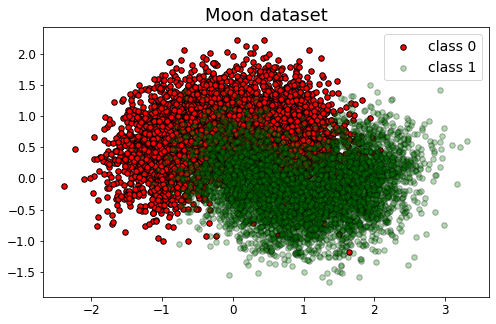

In [4]:
# Plot the moon dataset
plt.figure(figsize=(8, 4.96))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], s=30,
            c='r', edgecolor='k', label='class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], s=30,
            c='g', alpha=0.3, edgecolor='k', label='class 1')

plt.legend(fontsize=14)
plt.title("Moon dataset", fontsize=18)
plt.show()

In [5]:
# Split the moon dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
x_train.shape, x_test.shape

((8000, 2), (2000, 2))

In [6]:
# Use Grid reseach to find a good hyperparamter values
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    # The maximum number of leaf nodes.
    'max_leaf_nodes': list(range(2, 100)),
    # The minimum number of samples a node must have before it can be split
    'min_samples_split': [2, 3, 4],
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid=params,
                           cv=5,
                           verbose=1, n_jobs=7)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  37 tasks      | elapsed:    0.8s
[Parallel(n_jobs=7)]: Done 1418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=7)]: Done 1470 out of 1470 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=7,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
   

In [7]:
grid_search.best_params_

{'max_leaf_nodes': 23, 'min_samples_split': 2}

In [8]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=23,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

<font color='crimson'>By default, <code>GridSearchCV</code> trains the best model found on the whole training set (you can change this by setting <code>refit=False</code>).

In [9]:
# Measure the model's performance on the test set
from sklearn.metrics import accuracy_score

y_test_pred = grid_search.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.8735

**<font color='blue'>Q8: Grow a forest by following these steps:</font>**

- Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. (Hint: you can use Scikit-Learn’s `ShuffleSplit` class for this.)


- Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.


- Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s `mode()` function for this). This approach gives you majority-vote predictions over the test set.


- Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [10]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

subsets = []

shuffle_split = ShuffleSplit(n_splits=n_trees,
                             test_size=len(x_train)-n_instances,
#                              train_size=n_instances,
                             random_state=42)
for min_train_idx, min_test_idx in shuffle_split.split(x_train):
    x_mini_train = x_train[min_train_idx]
    y_min_train = y_train[min_train_idx]
    subsets.append((x_mini_train, y_min_train))

In [11]:
from sklearn.base import clone

forests = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

acc = []
for tree, (x_mini_train, y_mini_train) in zip(forests, subsets):
    tree.fit(x_mini_train, y_mini_train)

    y_test_pred = tree.predict(x_test)
    acc.append(accuracy_score(y_test, y_test_pred))
np.mean(acc)

0.7988824999999999

In [12]:
y_test_pred = np.empty([n_trees, len(x_test)], dtype=np.uint8)

for tree_idx, tree in enumerate(forests):
    y_test_pred[tree_idx] = tree.predict(x_test)

from scipy.stats import mode

y_test_pred_majority_votes, n_votes = mode(y_test_pred, axis=0)
accuracy_score(y_test, y_test_pred_majority_votes.reshape(-1, 1))

0.8735